In [2]:
import pandas as pd

In [3]:
diction = pd.read_csv('data_dictionary.csv', encoding='cp1252')
diction.head()

,summerOly_medal_counts.csv,Unnamed: 1,Unnamed: 2
0,variables,explanation,example
1,Rank,Rank of country based on total medals won,"1, 2"
2,NOC,Name of country as recorded for that Olympics,"China, France"
3,Gold,Number of Gold medals the country earned,"0, 1, 2"
4,Silver,Number of Silver medals the country earned,"0, 1, 2"


In [4]:
ath = pd.read_csv('summerOly_athletes.csv')
ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [5]:
medal = pd.read_csv('summerOly_medal_counts.csv')
medal.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [8]:
medal=medal.groupby(['Year','NOC']).agg({
    'Gold':'sum',
    'Silver':'sum',
    'Bronze':'sum',
    'Total':'sum'}).reset_index()
medal.head()

,Year,NOC,Gold,Silver,Bronze,Total
0,1896,Australia,2,0,0,2
1,1896,Austria,2,1,2,5
2,1896,Denmark,1,2,3,6
3,1896,France,5,4,2,11
4,1896,Germany,6,5,2,13


In [12]:
programs = pd.read_csv('summerOly_programs.csv', encoding='cp1252')
programs.shape
programs.head()

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [14]:
ath['Sex'] = ath['Sex'].map({'M': 1, 'F': 0})
ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,1,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,1,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,1,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,1,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),0,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [36]:
hosts = pd.read_csv('summerOly_hosts.csv')
hosts.head(8)

,Year,Host
0,1896,"Athens, Greece"
1,1900,"Paris, France"
2,1904,"St. Louis, United States"
3,1908,"London, United Kingdom"
4,1912,"Stockholm, Sweden"
5,1916,Cancelled (WWI – Berlin had been awarded)
6,1920,"Antwerp, Belgium"
7,1924,"Paris, France"


In [22]:
hosts[['host_city', 'host_country']] = hosts['Host'] \
    .str.split(',', n=1, expand=True)
hosts['host_city']   = hosts['host_city']  .str.strip()
hosts['host_country']= hosts['host_country'].str.strip()
hosts.head(8)

,Year,Host,host_city,host_country
0,1896,"Athens, Greece",Athens,Greece
1,1900,"Paris, France",Paris,France
2,1904,"St. Louis, United States",St. Louis,United States
3,1908,"London, United Kingdom",London,United Kingdom
4,1912,"Stockholm, Sweden",Stockholm,Sweden
5,1916,Cancelled (WWI – Berlin had been awarded),Cancelled (WWI – Berlin had been awarded),None
6,1920,"Antwerp, Belgium",Antwerp,Belgium
7,1924,"Paris, France",Paris,France


In [30]:
city2country = dict(zip(hosts['host_city'], hosts['host_country']))
# 3. 在 ath 中新增 Country 列，按 ath['City'] （同样要 strip）做映射
ath['Country'] = ath['City'].str.strip().map(city2country)
# 4. 检查结果
ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,Country
0,A Dijiang,1,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,Spain
1,A Lamusi,1,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal,United Kingdom
2,Gunnar Aaby,1,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal,NaN
3,Edgar Aabye,1,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,France
4,Cornelia (-strannood),0,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,United States


In [34]:
# 2. 构建 Year → host_country 的映射字典
year2country = hosts.set_index('Year')['host_country'].to_dict()

# 3. 在 ath 中新增一列 Country，按 ath['Year'] 映射
ath['Country'] = ath['Year'].map(year2country)

# 4. 验证结果
ath.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,Country
0,A Dijiang,1,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,Spain
1,A Lamusi,1,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal,United Kingdom
2,Gunnar Aaby,1,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal,Belgium
3,Edgar Aabye,1,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,France
4,Cornelia (-strannood),0,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,United States


only ath，programs， medal

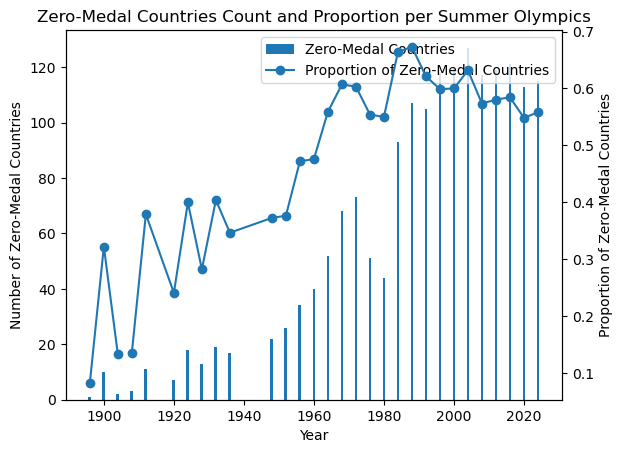

In [47]:

import matplotlib.pyplot as plt

participating = ath.groupby('Year')['NOC'].nunique().reset_index(name='participating_nocs')

# 2. 读取 medal_counts 数据，统计每届获牌国家数
medal_nocs = medal.groupby('Year')['NOC'].nunique().reset_index(name='medal_nocs')

# 3. 合并并计算零奖牌国家数及比例
df = pd.merge(participating, medal_nocs, on='Year', how='left')
#df['medal_nocs'].fillna(0, inplace=True)
df['zero_count'] = df['participating_nocs'] - df['medal_nocs']
df['zero_prop'] = df['zero_count'] / df['participating_nocs']

# 4. 绘图：柱状图（零奖牌国家数）+ 折线（比例）
fig, ax = plt.subplots()
ax.bar(df['Year'], df['zero_count'], label='Zero-Medal Countries')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Zero-Medal Countries')
ax.set_title('Zero-Medal Countries Count and Proportion per Summer Olympics')

ax2 = ax.twinx()
ax2.plot(df['Year'], df['zero_prop'], marker='o', label='Proportion of Zero-Medal Countries')
ax2.set_ylabel('Proportion of Zero-Medal Countries')

# 合并并显示图例
lines, labels   = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')


plt.show()


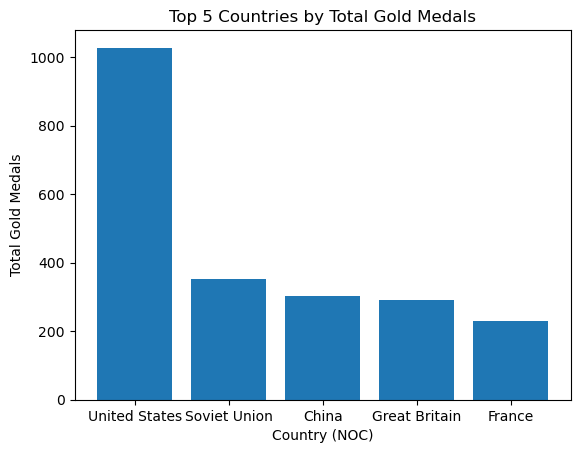

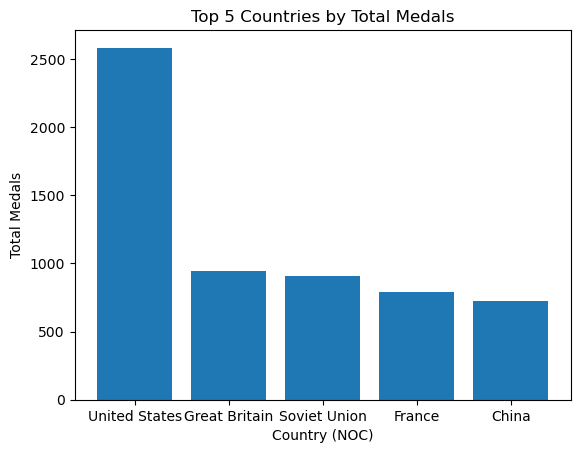

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 3. 按国家聚合金牌和总奖牌
gold_by_noc = medal.groupby('NOC')['Gold'].sum().reset_index()
total_by_noc = medal.groupby('NOC')['Total'].sum().reset_index()

# 4. 获取前 5 名国家
top5_gold = gold_by_noc.sort_values('Gold', ascending=False).head(5)
top5_total = total_by_noc.sort_values('Total', ascending=False).head(5)

# 5. 绘制“金牌最多的前 5 国家”柱状图
fig, ax = plt.subplots()
ax.bar(top5_gold['NOC'], top5_gold['Gold'])
ax.set_title('Top 5 Countries by Total Gold Medals')
ax.set_xlabel('Country (NOC)')
ax.set_ylabel('Total Gold Medals')
plt.show()

# 6. 绘制“总奖牌最多的前 5 国家”柱状图
fig, ax = plt.subplots()
ax.bar(top5_total['NOC'], top5_total['Total'])
ax.set_title('Top 5 Countries by Total Medals')
ax.set_xlabel('Country (NOC)')
ax.set_ylabel('Total Medals')
plt.show()


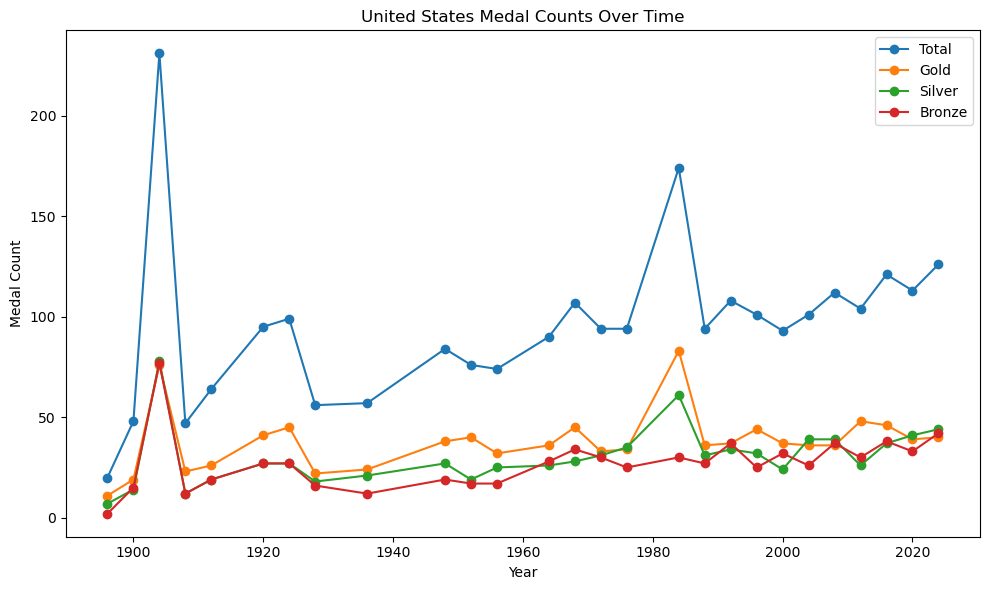

In [51]:
# 3. 筛选出美国数据，并按年份排序
us = medal[medal['NOC'] == 'United States'].sort_values('Year')

# 4. 绘图：总奖牌与金、银、铜随年份变化
plt.figure(figsize=(10, 6))
plt.plot(us['Year'], us['Total'], marker='o', label='Total')
plt.plot(us['Year'], us['Gold'], marker='o', label='Gold')
plt.plot(us['Year'], us['Silver'], marker='o', label='Silver')
plt.plot(us['Year'], us['Bronze'], marker='o', label='Bronze')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('United States Medal Counts Over Time')
plt.legend()
plt.tight_layout()
plt.show()

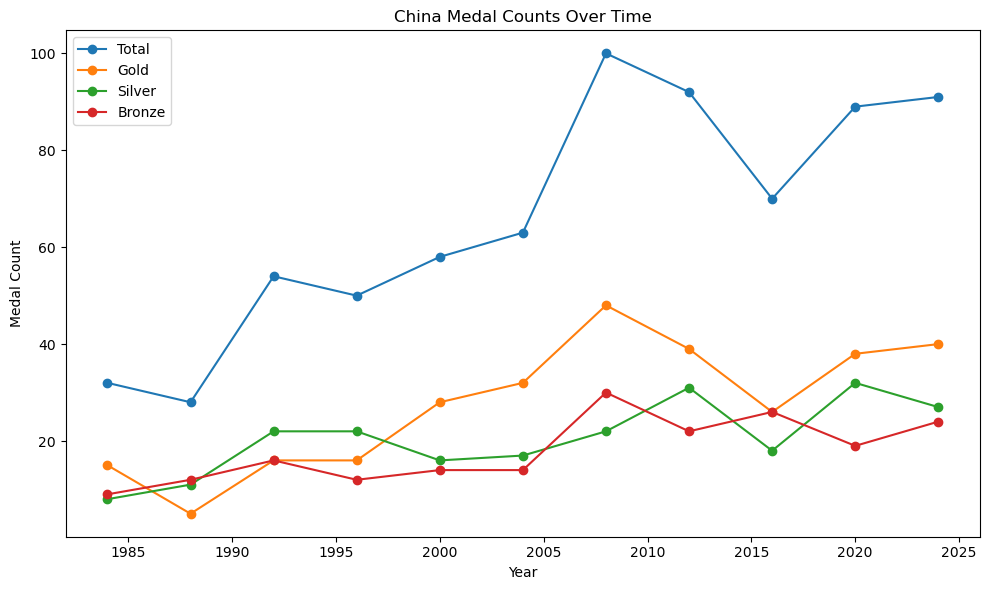

In [55]:
cn = medal[medal['NOC'] == 'China'].sort_values('Year')

plt.figure(figsize=(10, 6))
plt.plot(cn['Year'], cn['Total'], marker='o', label='Total')
plt.plot(cn['Year'], cn['Gold'], marker='o', label='Gold')
plt.plot(cn['Year'], cn['Silver'], marker='o', label='Silver')
plt.plot(cn['Year'], cn['Bronze'], marker='o', label='Bronze')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('China Medal Counts Over Time')
plt.legend()
plt.tight_layout()
plt.show()